# Collect tweets in MongoDB

## install python libraries

In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 9.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 29.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy

     |████████████████████████████████| 64 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 67.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.9 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


# Import Python Libraries

In [4]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

## Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info.

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to mongoDB cluster

In [7]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [8]:

rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [9]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [10]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:01:38 +0000 2021'
'Thu Nov 04 19:01:38 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:30 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 0

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:57 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:56 +0000 2021'
'Thu Nov 04 19:00:55 +0000 2021'
'Thu Nov 04 19:00:55 +0000 2021'
'Thu Nov 04 19:00:54 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:53 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:52 +0000 2021'
'Thu Nov 04 19:00:51 +0000 2021'
'Thu Nov 04 19:00:50 +0000 2021'
'Thu Nov 04 19:00:49 +0000 2021'
'Thu Nov 04 19:00:49 +0000 2021'
'Thu Nov 04 19:00:49 +0000 2021'
'Thu Nov 04 19:00:48 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:47 +0000 2021'
'Thu Nov 04 19:00:46 +0000 2021'
'Thu Nov 0

KeyboardInterrupt: 

In [12]:

print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

298
276


In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote


In [15]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: CBS 58 News
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Mrs.H. 💙 #MaskUp 😷
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: WIDeptHealthServices
text: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vac… https://t.co/PgDWIHqFlw
----
name: Nathan Joyner
text: Daily US Covid Deaths by County For MN   2021-11-02:  Updated Covid insights from our data scientists and USAFacts… https://t.co/59gigltU7J
----
name: Skeptic
text: @_evelynrae Covid Vaccines are safe. Billions have been vaccinated world over. Getting vaccinated is important to eradicate #COVID19
----
name: HOUmanitarian
text: Harris County Judge Hidalgo lowers COVID threat level to 'significant' https://t.co/bYtGuumzY0
----
name: Totus Tu

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote


In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities
0,618430ffcbcb0a52d7342a06,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,None,False,0,0,False,False,en,NaN,NaN,NaN
1,61843100cbcb0a52d7342a51,Thu Nov 04 19:00:11 +0000 2021,1456335482460114970,1456335482460114970,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,4,0,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN
2,61842e15cbcb0a52d73429a0,Thu Nov 04 19:01:17 +0000 2021,1456335761876258836,1456335761876258836,RT @WHO: When a #COVID19 vaccine becomes avail...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,39,0,False,False,en,{'created_at': 'Thu Nov 04 14:41:49 +0000 2021...,NaN,NaN
3,618430ffcbcb0a52d7342a16,Thu Nov 04 19:00:27 +0000 2021,1456335549468483592,1456335549468483592,RT @DHSWI: Here is today's snapshot of COVID-1...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,None,False,5,0,False,False,en,{'created_at': 'Thu Nov 04 19:00:02 +0000 2021...,NaN,NaN
4,61842e15cbcb0a52d73429c9,Thu Nov 04 19:01:01 +0000 2021,1456335693815365634,1456335693815365634,RT @DHSWI: Here is today's snapshot of COVID-1...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,None,False,2,0,False,False,en,{'created_at': 'Thu Nov 04 19:00:02 +0000 2021...,NaN,NaN
5,61842e14cbcb0a52d7342997,Thu Nov 04 19:01:20 +0000 2021,1456335775386112020,1456335775386112020,RT @WHO: Most people have mild or no side effe...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,43,0,False,False,en,{'created_at': 'Thu Nov 04 15:01:42 +0000 2021...,NaN,NaN
6,61843101cbcb0a52d7342a89,Thu Nov 04 18:59:59 +0000 2021,1456335435861528590,1456335435861528590,RT @DrTomFrieden: The idea that there will soo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,72,0,False,False,en,{'created_at': 'Thu Nov 04 14:15:26 +0000 2021...,NaN,NaN
7,61843100cbcb0a52d7342a46,Thu Nov 04 19:00:13 +0000 2021,1456335494091087882,1456335494091087882,RT @FreedomPodcast1: 93.7% of the latest #COVI...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,307,0,False,False,en,{'created_at': 'Wed Nov 03 14:59:29 +0000 2021...,NaN,NaN
8,61842e15cbcb0a52d73429b4,Thu Nov 04 19:01:12 +0000 2021,1456335738912616452,1456335738912616452,RT @nycHealthy: 🎉 Children ages 5 to 11 are no...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,36,0,False,False,en,{'created_at': 'Thu Nov 04 13:05:03 +0000 2021...,NaN,NaN
9,618430ffcbcb0a52d7342a10,Thu Nov 04 19:00:31 +0000 2021,1456335568183312389,1456335568183312389,RT @EduEngineer: This thread is 

<AxesSubplot:>

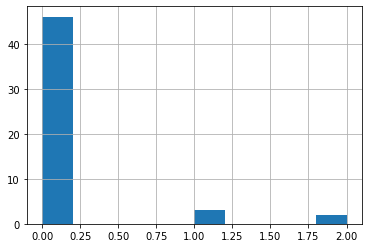

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count